In [22]:
# Importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

%matplotlib inline

In [2]:
#Loading your dataset
data = pd.read_csv("C:/Users/luengoag/Desktop/Private/Python/breast_cancer/breast_cancer.csv")

In [4]:
#Reviewing the dataset
data.shape

(569, 33)

In [6]:
data.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
#Removing extra column with Null values
data = data.drop(columns='Unnamed: 32',axis='columns')

In [4]:
from sklearn.preprocessing import LabelEncoder
#Encoding the diagnosis column to be used as a numeric variable.
le = LabelEncoder()

psd_data = data.copy().drop(columns='diagnosis', axis="columns")
psd_data['diagnosis'] = le.fit_transform(data['diagnosis'])

Standardize the features

The StandardScaler is a feature scaling technique commonly used in machine learning preprocessing. It standardizes the features of a dataset by removing the mean and scaling to unit variance.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(
    data.drop(columns='diagnosis', axis="columns")
)

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, random_state=None, shuffle=True)
kf

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_fit = pca.fit(scaled_data)
pca_result = pca.transform(scaled_data)

In [68]:
pca_df = pd.DataFrame(pca_result)

In [69]:
pca_df_cat = pd.concat([psd_data['diagnosis'],pca_df], axis='columns')

In [70]:
pca_df_cat

,diagnosis,0,1,2
0,1,9.183200,1.971271,-1.171625
1,1,2.383298,-3.753459,-0.580229
2,1,5.742472,-1.080350,-0.533088
3,1,7.124384,10.272225,-3.150161
4,1,3.945694,-1.959689,1.401177
...,...,...,...,...
564,1,6.435329,-3.565358,2.399112
565,1,3.789458,-3.573419,2.029505
566,1,1.251890,-1.893977,0.534467
567,1,10.365035,1.696398,-1.907418


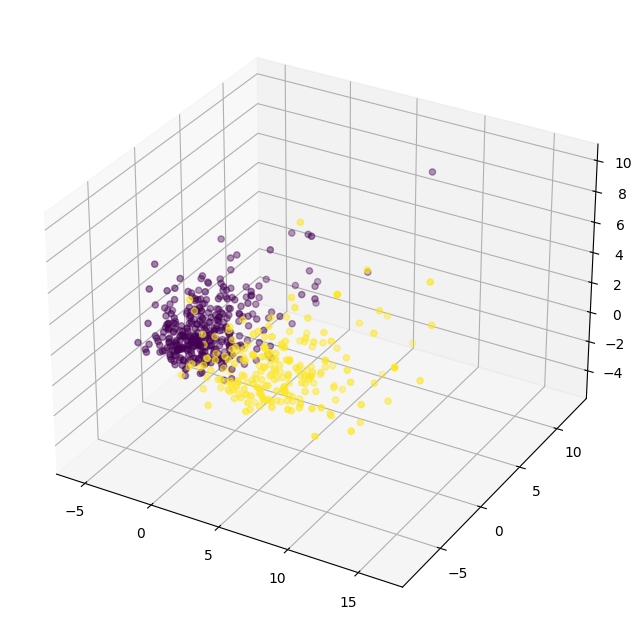

In [71]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(pca_df_cat[0],pca_df_cat[1],pca_df_cat[2],c=pca_df_cat['diagnosis'])

In [73]:
# Split the dataset into features (X) and target variable (y)
#X = prepross_data.drop(columns=['diagnosis'])  # Features
#y = prepross_data['diagnosis']  # Target variable

X = pca_df_cat.drop(columns=['diagnosis'])
y= data['diagnosis']
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear',decision_function_shape='ovo')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Classification Report:
#               precision    recall  f1-score   support

#            0       0.97      0.99      0.98        71
#            1       0.98      0.95      0.96        43

#     accuracy                           0.97       114
#    macro avg       0.97      0.97      0.97       114
# weighted avg       0.97      0.97      0.97       114

Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [65]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix:
# [[70  1]
#  [ 2 41]]

Confusion Matrix:
[[70  1]
 [ 3 40]]
